<a href="https://colab.research.google.com/github/NoCodeProgram/deepLearning/blob/main/cnn/cifar_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 170498071/170498071 [00:02<00:00, 81548314.94it/s]


Extracting /root/.pytorch/CIFAR10_data/cifar-10-python.tar.gz to /root/.pytorch/CIFAR10_data/
50000
label: 2
shape: (32, 32, 3)


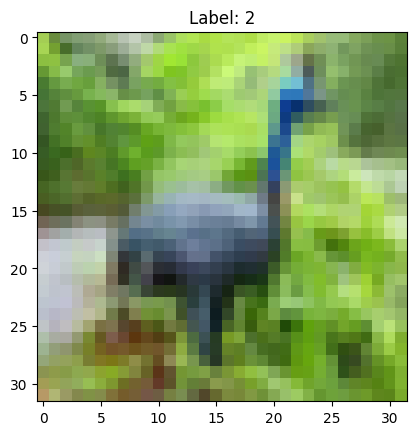

In [1]:
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
CIFAR10_trainset = datasets.CIFAR10('~/.pytorch/CIFAR10_data/', download=True, train=True)
print(len(CIFAR10_trainset))

# Fetch the first image and its label
CIFAR10_img, CIFAR10_label = CIFAR10_trainset[6]
# Convert the PIL Image to a numpy array
CIFAR10_img_array = np.array(CIFAR10_img)

print(f"label: {CIFAR10_label}")
print(f"shape: {CIFAR10_img_array.shape}")
# Display the image
plt.imshow(CIFAR10_img_array)  # No need for cmap='gray' for CIFAR10
plt.title(f'Label: {CIFAR10_label}')
plt.show()

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# 1. Data loading and preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizing for each RGB channel
])

train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

val_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False)

# 2. Define the mynet model
class MyNet(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        super().__init__()
        self.seq_model = nn.Sequential(
            nn.Linear(input_size, hidden_size, bias=True),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size, bias=True),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size, bias=True),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, hidden_size, bias=True),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # print(x.size())
        x = x.view(x.size(0), -1)  # Reshape the input here
        return self.seq_model(x)

mynet = MyNet(input_size=32*32*3, hidden_size=128, output_size=10)


100%|██████████| 170498071/170498071 [00:01<00:00, 99027909.69it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data


In [3]:
mynet.eval()
correct_count = 0
with torch.no_grad():
    for data, label in val_loader:
        scores = mynet(data)
        predicted = scores.argmax(dim=1)
        correct_count += predicted.eq(label).sum().item()

    val_accuracy = 100. * correct_count / len(val_loader.dataset)

print(f"First Validation Accuracy: {val_accuracy:.2f}%")


First Validation Accuracy: 9.25%


In [4]:
import torch
import torchvision
import matplotlib.pyplot as plt

if torch.backends.mps.is_available():
    my_device = torch.device('mps')
elif torch.cuda.is_available():
    my_device = torch.device('cuda')
else:
    my_device = torch.device('cpu')

print(my_device)

cuda


In [ ]:
# 3. Initialize loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(mynet.parameters(), lr=0.001)

# 4. Train the model
mynet.to(my_device)
num_epochs = 100
for epoch in range(num_epochs):
    mynet.train()
    for batch_idx, (data, label) in enumerate(train_loader):
        data, label = data.to(my_device), label.to(my_device)
        scores = mynet(data)
        loss = loss_fn(scores, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    mynet.eval()
    val_loss = 0.0
    correct = 0
    with torch.no_grad():
        for data, label in val_loader:
            data, label = data.to(my_device), label.to(my_device)
            scores = mynet(data)
            loss = loss_fn(scores, label)
            val_loss += loss.item() * data.size(0)

            predicted = scores.argmax(dim=1)
            correct += predicted.eq(label).sum().item()

    val_loss /= len(val_loader.dataset)
    val_accuracy = 100. * correct / len(val_loader.dataset)

    print(f"Epoch [{epoch + 1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")


Epoch [1/100], Training Loss: 1.5342, Validation Loss: 1.6114, Validation Accuracy: 42.26%
Epoch [2/100], Training Loss: 1.1836, Validation Loss: 1.5214, Validation Accuracy: 46.08%
Epoch [3/100], Training Loss: 1.3263, Validation Loss: 1.4422, Validation Accuracy: 48.79%
Epoch [4/100], Training Loss: 1.3654, Validation Loss: 1.4113, Validation Accuracy: 50.20%
Epoch [5/100], Training Loss: 1.2950, Validation Loss: 1.3996, Validation Accuracy: 50.76%
Epoch [6/100], Training Loss: 1.5392, Validation Loss: 1.3810, Validation Accuracy: 51.37%
Epoch [7/100], Training Loss: 1.3302, Validation Loss: 1.3716, Validation Accuracy: 52.31%
Epoch [8/100], Training Loss: 1.3337, Validation Loss: 1.3590, Validation Accuracy: 52.50%
Epoch [9/100], Training Loss: 1.5015, Validation Loss: 1.3663, Validation Accuracy: 52.07%
Epoch [10/100], Training Loss: 1.3429, Validation Loss: 1.3752, Validation Accuracy: 52.51%
Epoch [11/100], Training Loss: 1.6284, Validation Loss: 1.3687, Validation Accuracy: 53.1